In [1]:
#Import libraries 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import scale 
import os, sys, importlib   
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale  
import seaborn as sns 
import statsmodels.api as sm

# Partition 1 : Price of Risk

Term Spread

In [2]:
#Import 24 month 
Tbill24 = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\24months_Treasury.xlsx")
Tbill24['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Tbill24.set_index('date', inplace=True)
Tbill24.drop(['Period'], axis=1, inplace=True)
Tbill24

,Return,Coupon Rate
date,,
1998-01-31,16.73,16.08
1998-02-28,16.73,16.08
1998-03-31,16.73,16.08
1998-04-30,16.73,16.08
1998-05-31,16.73,16.08
...,...,...
2023-01-31,5.06,5.00
2023-02-28,5.06,5.00
2023-03-31,5.06,5.00


In [3]:
#Import 3 months 
Tbill3 = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Tbill_3months.xlsx")
Tbill3['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Tbill3.set_index('date', inplace=True)
Tbill3.drop(['Period'], axis=1, inplace=True)
Tbill3

,Discount,Yield
date,,
1998-01-31,12.68,13.09
1998-02-28,12.68,13.09
1998-03-31,12.68,13.09
1998-04-30,12.68,13.09
1998-05-31,12.57,12.98
...,...,...
2023-01-31,3.47,3.50
2023-02-28,3.47,3.50
2023-03-31,3.47,3.50


In [4]:
#Taking return of 24 months minus yield of 3 months to get yield curve
Term = Tbill24['Return'] - Tbill3['Yield']  

<Axes: xlabel='date'>

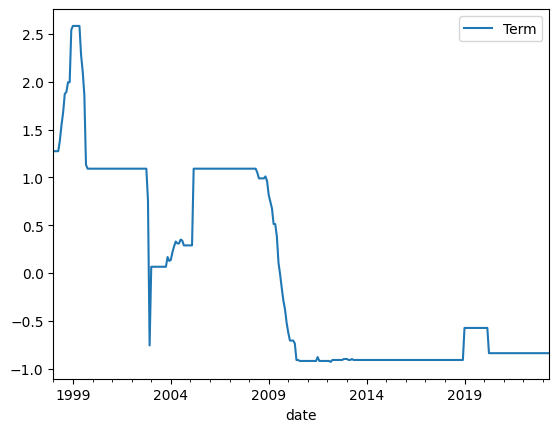

In [5]:
Term_s = scale(Term)
Term_s = pd.DataFrame(Term_s, columns=['Term'])
Term_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Term_s.set_index('date', inplace=True)
Term_s.plot()

Interbank spread

In [6]:
#Import interbank 
Interbank = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Interbank_Rate.xlsx")
Interbank['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Interbank.set_index('date', inplace=True)
Interbank.drop(['Period'], axis=1, inplace=True)
Interbank

,In percent
date,
1998-01-31,11.00
1998-02-28,9.00
1998-03-31,9.50
1998-04-30,9.25
1998-05-31,11.00
...,...
2023-01-31,20.00
2023-02-28,20.00
2023-03-31,10.00


In [7]:
Interbank_spread = Interbank['In percent'] - Tbill3['Yield']

<Axes: xlabel='date'>

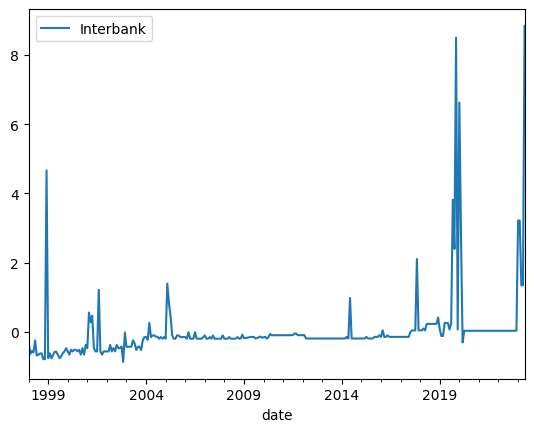

In [8]:
Interbank_s = scale(Interbank_spread)
Interbank_s = pd.DataFrame(Interbank_s, columns=['Interbank'])
Interbank_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Interbank_s.set_index('date', inplace=True)
Interbank_s.plot()

Sovereign spread

In [9]:
#Import 24 months US
Tbill24_US = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\2yearTbill_USA.xlsx")
Tbill24_US['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Tbill24_US.drop(['observation_date'], axis=1, inplace=True)
Tbill24_US.set_index('date', inplace=True)
Tbill24_US

,GS2
date,
1998-01-31,5.36
1998-02-28,5.42
1998-03-31,5.56
1998-04-30,5.56
1998-05-31,5.59
...,...
2023-01-31,4.21
2023-02-28,4.53
2023-03-31,4.30


In [10]:
Sovereign_spread = Tbill24['Return'] - Tbill24_US['GS2']

In [11]:
sovereign_s = scale(Sovereign_spread)
sovereign_s = pd.DataFrame(sovereign_s, columns=['Sov'])
sovereign_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
sovereign_s.set_index('date', inplace=True)
sovereign_s

,Sov
date,
1998-01-31,2.032551
1998-02-28,2.009548
1998-03-31,1.955873
1998-04-30,1.955873
1998-05-31,1.944371
...,...
2023-01-31,-2.000748
2023-02-28,-2.123434
2023-03-31,-2.035254


Spread between USD loans and USD deposits

In [12]:
#Import USD interest on loans
USDloan = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\USDloan_interest.xlsx")
USDloan['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
USDloan.set_index('date', inplace=True)
USDloan.drop(['Period'], axis=1, inplace=True)
USDloan

,In percent
date,
1998-01-31,11.85
1998-02-28,11.82
1998-03-31,11.80
1998-04-30,11.45
1998-05-31,11.57
...,...
2023-01-31,5.38
2023-02-28,5.17
2023-03-31,4.04


In [13]:
#Scale data 
USDloan_s = scale(USDloan)
USDloan_s = pd.DataFrame(USDloan_s, columns=['USDloan'])
USDloan_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
USDloan_s.set_index('date', inplace=True)
USDloan_s

,USDloan
date,
1998-01-31,2.155117
1998-02-28,2.137622
1998-03-31,2.125959
1998-04-30,1.921848
1998-05-31,1.991829
...,...
2023-01-31,-1.618006
2023-02-28,-1.740472
2023-03-31,-2.399457


<Axes: xlabel='date'>

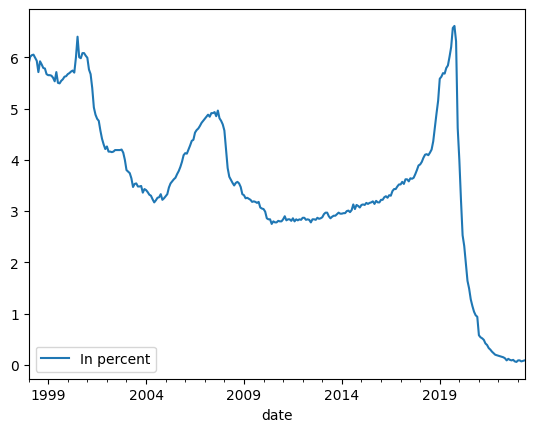

In [14]:
#Import USD interest on depoists
USDdeprate = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\ratedepUSD.xlsx")
USDdeprate['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
USDdeprate.set_index('date', inplace=True)
USDdeprate.drop(['Period'], axis=1, inplace=True)
USDdeprate.plot()

<Axes: xlabel='date'>

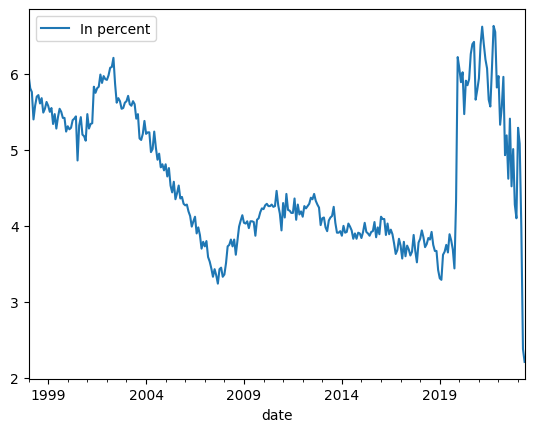

In [15]:
#Spread between loans and deposits ratef
USDratespread = USDloan - USDdeprate
USDratespread.plot()

<Axes: xlabel='date'>

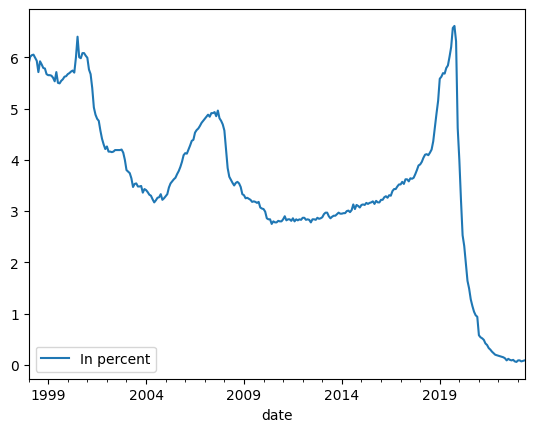

In [16]:
USDdeprate.plot()

<Axes: xlabel='date'>

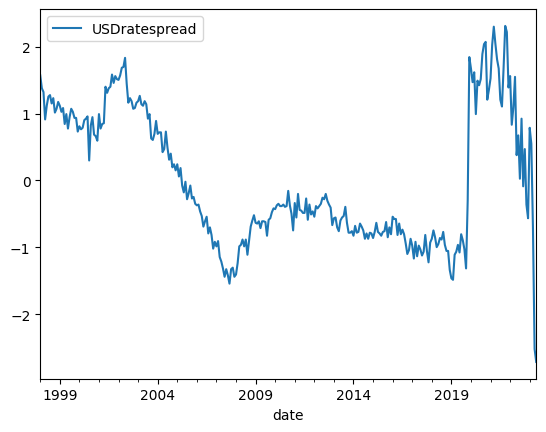

In [17]:
#Scale data 
USDratespread_s = scale(USDratespread)
USDratespread_s = pd.DataFrame(USDratespread_s, columns=['USDratespread'])
USDratespread_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
USDratespread_s.set_index('date', inplace=True)
USDratespread_s.plot()

<Axes: xlabel='date'>

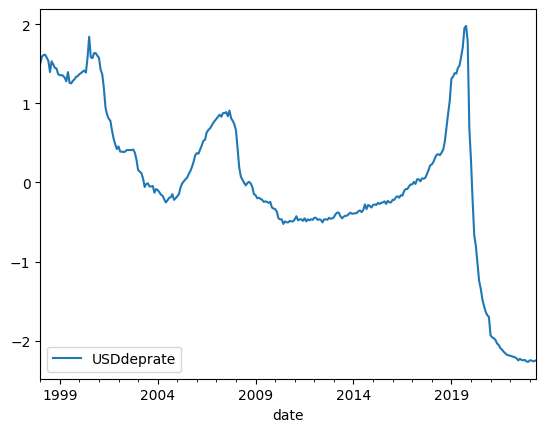

In [18]:
#Scale data 
USDdeprate_s = scale(USDdeprate)
USDdeprate_s = pd.DataFrame(USDdeprate_s, columns=['USDdeprate'])
USDdeprate_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
USDdeprate_s.set_index('date', inplace=True)
USDdeprate_s.plot()

LBP rate spread

In [19]:
#Import LBP interest on loans
LBPloan = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\LBPloan_interest.xlsx")
LBPloan['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
LBPloan.set_index('date', inplace=True)
LBPloan.drop(['Period'], axis=1, inplace=True)
LBPloan

,In percent
date,
1998-01-31,20.40
1998-02-28,20.45
1998-03-31,20.51
1998-04-30,20.21
1998-05-31,20.37
...,...
2023-01-31,5.61
2023-02-28,4.75
2023-03-31,5.61


In [20]:
#Import LBP interest on deposits
LBPdeprate = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\ratedepoLBP.xlsx")
LBPdeprate['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
LBPdeprate.set_index('date', inplace=True)
LBPdeprate.drop(['Period'], axis=1, inplace=True)
LBPdeprate

,In percent
date,
1998-01-31,13.07
1998-02-28,13.10
1998-03-31,13.20
1998-04-30,13.20
1998-05-31,13.22
...,...
2023-01-31,0.73
2023-02-28,0.71
2023-03-31,0.63


<Axes: xlabel='date'>

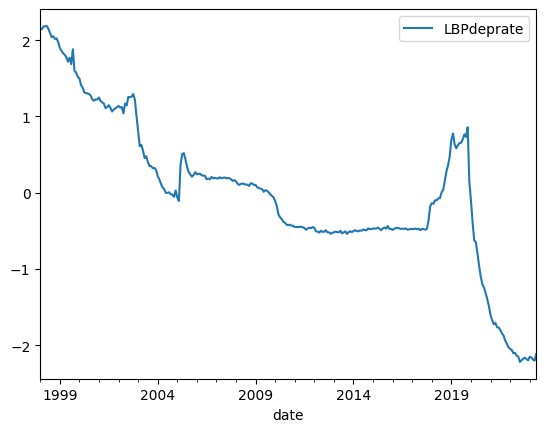

In [21]:
#Scale data 
LBPdeprate_s = scale(LBPdeprate)
LBPdeprate_s = pd.DataFrame(LBPdeprate_s, columns=['LBPdeprate'])
LBPdeprate_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
LBPdeprate_s.set_index('date', inplace=True)
LBPdeprate_s.plot()

<Axes: xlabel='date'>

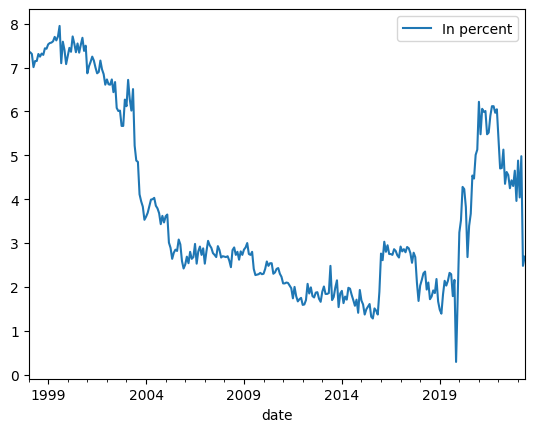

In [22]:
LBPratespread = LBPloan - LBPdeprate
LBPratespread.plot()

<Axes: xlabel='date'>

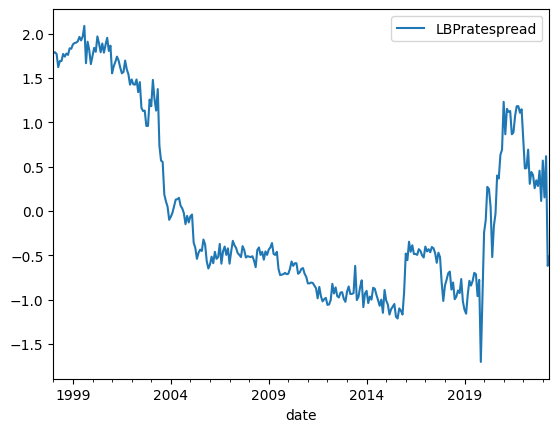

In [23]:
#Scale data 
LBPratespread_s = scale(LBPratespread)
LBPratespread_s = pd.DataFrame(LBPratespread_s, columns=['LBPratespread'])
LBPratespread_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
LBPratespread_s.set_index('date', inplace=True)
LBPratespread_s.plot()

Spread between certificate deposit and deposits in LBP

In [24]:
#Import CD interest 
CDrate = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\CDsrate.xlsx")
CDrate['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
CDrate.rename(columns={'BDL 45-days CDs Rate' : 'In percent'}, inplace=True)
CDrate.set_index('date', inplace=True)
CDrate.drop(['Period'], axis=1, inplace=True)

<Axes: xlabel='date'>

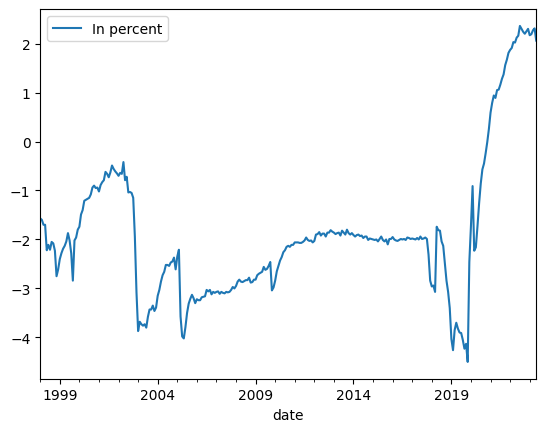

In [25]:
CDratespread = CDrate - LBPdeprate
CDratespread.plot()

<Axes: xlabel='date'>

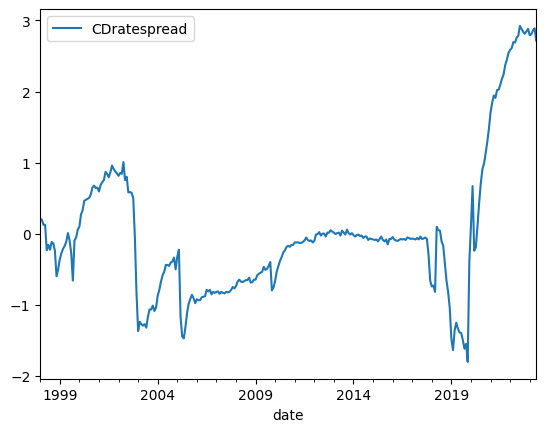

In [26]:
#Scale data 
CDratespread_s = scale(CDratespread)
CDratespread_s = pd.DataFrame(CDratespread_s, columns=['CDratespread'])
CDratespread_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
CDratespread_s.set_index('date', inplace=True)
CDratespread_s.plot()

Spread between deposits and 3 month bill 

In [27]:
dep_sovspread = Tbill3['Yield'] - LBPdeprate['In percent']

<Axes: xlabel='date'>

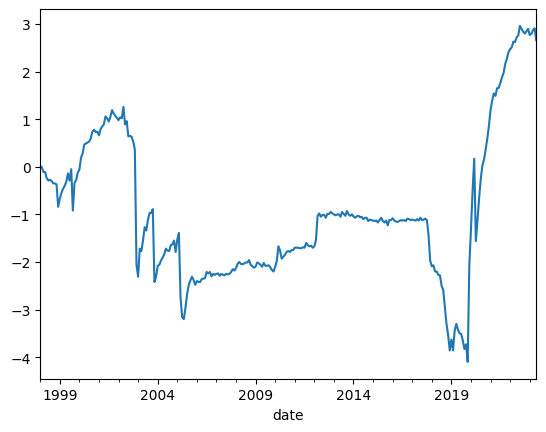

In [28]:
dep_sovspread.plot()

Partition 2 : Leverage

In [29]:
#Import claims
claimsdf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\claims_residents.xlsx")
claimsdf['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
claimsdf.set_index('date', inplace=True)
claimsdf.drop(['Period'], axis=1, inplace=True)
claimsdf.rename(columns={'in billions of LBP (in LBP)':'LBPclaims', 'in billions of LPB (in Foreign currencies)':'FXclaims'}, inplace=True)
claimsdf

,LBPclaims,FXclaims
date,,
1998-01-31,1953.1,13823.9
1998-02-28,1944.6,13940.0
1998-03-31,1967.6,14227.0
1998-04-30,1993.8,14726.4
1998-05-31,2010.4,14903.5
...,...,...
2023-01-31,13566.4,12738.6
2023-02-28,15190.1,123246.7
2023-03-31,13127.9,116623.8


In [30]:
#Import claims
depositsdf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Deposits.xlsx")
depositsdf['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
depositsdf.set_index('date', inplace=True)
depositsdf.drop(['Period'], axis=1, inplace=True)
depositsdf.rename(columns={'LBP deposits residents':'LBPdepositsres', 'Total LBP deposits':'TotalLBPdeposits', 'Foreign deposits residents':'FXdepositsres', 'Total foreign deposits':'TotalFXdeposits'}, inplace=True)
depositsdf

,LBPdepositsres,TotalLBPdeposits,FXdepositsres,TotalFXdeposits,Total deposits
date,,,,,
1998-01-31,13483.1,14162.0,19880.0,24669.5,38831.5
1998-02-28,13314.5,13976.0,20615.2,25394.7,39370.7
1998-03-31,12711.5,13355.6,21261.0,26294.8,39650.4
1998-04-30,12863.7,13526.1,21869.4,26903.5,40429.6
1998-05-31,13322.6,13958.3,22040.7,27246.2,41204.5
...,...,...,...,...,...
2023-01-31,40763.0,43814.3,110071.2,142207.8,186022.1
2023-02-28,39819.3,42854.8,1085198.5,1404148.6,1447003.4
2023-03-31,47188.7,50348.1,1077320.0,1396342.7,1446690.8


In [31]:
#Claims in FX over deposits in FX
credit_deposit_ratio_FX = claimsdf['FXclaims']/depositsdf['TotalFXdeposits']

In [32]:
#Claims in LBP over deposits in LBP
credit_deposit_ratio_LBP = claimsdf['LBPclaims']/depositsdf['TotalLBPdeposits']

In [33]:
#Scale data 
Credit_Dep_USD_s = scale(credit_deposit_ratio_FX )
Credit_Dep_USD_s = pd.DataFrame(Credit_Dep_USD_s, columns=['Credit_dep_USD'])
Credit_Dep_USD_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Credit_Dep_USD_s.set_index('date', inplace=True)
Credit_Dep_USD_s

,Credit_dep_USD
date,
1998-01-31,1.932797
1998-02-28,1.831789
1998-03-31,1.762192
1998-04-30,1.818049
1998-05-31,1.814648
...,...
2023-01-31,-2.227385
2023-02-28,-2.243327
2023-03-31,-2.280904


In [34]:
#Scale data 
Credit_Dep_LBP_s = scale(credit_deposit_ratio_LBP)
Credit_Dep_LBP_s = pd.DataFrame(Credit_Dep_LBP_s, columns=['Credit_dep_LBP'])
Credit_Dep_LBP_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Credit_Dep_LBP_s.set_index('date', inplace=True)
Credit_Dep_LBP_s

,Credit_dep_LBP
date,
1998-01-31,-1.018522
1998-02-28,-1.005170
1998-03-31,-0.916112
1998-04-30,-0.915242
1998-05-31,-0.951961
...,...
2023-01-31,0.849837
2023-02-28,1.337494
2023-03-31,0.317895


<Axes: xlabel='date'>

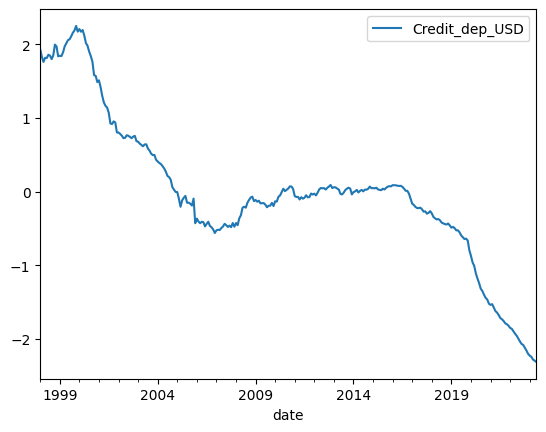

In [35]:
Credit_Dep_USD_s.plot()

<Axes: xlabel='date'>

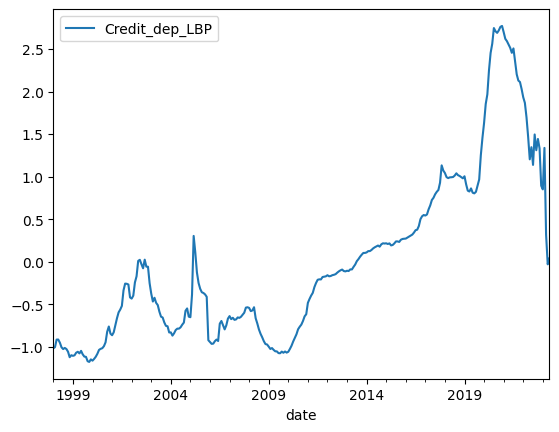

In [36]:
Credit_Dep_LBP_s.plot()

# Partition 3: External macro-financial vulnerabilities

EMPI

In [37]:
#Getting the datframe for reserves 
res = pd.read_excel(r'G:\Mon Drive\S2 M2\Dissertation\Data\exported_Foreign Assets of Banque du Liban - Copie.xlsx') 
res['date_column'] = pd.date_range(start='2001-12-31', end='2023-01-31', freq='M')
res.set_index('date_column', inplace=True)
res.rename(columns={"Foreign Currencies in Millions of USD": "FXres"}, inplace=True)
res

,FXres,TOTAL (Excluding Gold) in Millions of USD,Securities in Millions of USD
date_column,,,
2001-12-31,4361,4401,40
2002-01-31,4539,4566,27
2002-02-28,4560,4588,28
2002-03-31,3638,3666,28
2002-04-30,3348,3384,36
...,...,...,...
2022-09-30,10779,14910,4131
2022-10-31,10599,15288,4689
2022-11-30,10404,15198,4793


In [38]:
FXres = res['FXres'] #Taking the foreign currency reserves

In [39]:
#Import the black market rate 
market = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\usd-to-lbp-market-rate.xls.xlsx")
market['DateTime'] = pd.to_datetime(market['DateTime'], format='%Y-%m-%d %H:%M:%S')
market.set_index('DateTime', inplace=True)
market = market.loc["2019-08-01":"2023-08-28 16:12:55"] #Take sample after the fixed rate is gone
market_monthly = market.resample('M').mean()
print(market_monthly)

              USD to LBP
DateTime                
2019-08-31   1572.258065
2019-09-30   1681.034483
2019-10-31   1721.935484
2019-11-30   1899.666667
2019-12-31   2063.857143
2020-01-31   2271.172840
2020-02-29   2364.347826
2020-03-31   2621.382979
2020-04-30   3243.333333
2020-05-31   4093.500000
2020-06-30   5244.444444
2020-07-31   8081.168831
2020-08-31   7432.520325
2020-09-30   7685.641026
2020-10-31   7803.343373
2020-11-30   7820.217391
2020-12-31   8286.424870
2021-01-31   8762.157895
2021-02-28   9138.005319
2021-03-31  11707.900763
2021-04-30  12201.282723
2021-05-31  12713.386243
2021-06-30  15274.082126
2021-07-31  19407.547170
2021-08-31  19587.014563
2021-09-30  16478.826531
2021-10-31  19690.833333
2021-11-30  22899.881517
2021-12-31  25911.461126
2022-01-31  26492.785714
2022-02-28  20926.096491
2022-03-31  22945.198675
2022-04-30  25760.334646
2022-05-31  29595.125786
2022-06-30  28607.297980
2022-07-31  29546.143617
2022-08-31  32227.693966
2022-09-30  36819.418605


In [40]:
#Import bdl official fixed exchange rate 
bdl_rate = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\BDL_Rate_good.xlsx")
bdl_rate['date_column'] = pd.date_range(start='1999-01-31', end='2023-01-31', freq='M')
bdl_rate = bdl_rate.drop(['Period', 'End of Period'], axis = 1)
bdl_rate.set_index('date_column', inplace=True)
bdl_rate = bdl_rate.loc['1999-01-01':'2019-08-01'] #Take sample until the crash in the 8th month of 2019
bdl_rate.rename(columns={"Period Average": "USD to LBP"}, inplace=True)
print(bdl_rate)

             USD to LBP
date_column            
1999-01-31       1508.0
1999-02-28       1508.0
1999-03-31       1508.0
1999-04-30       1508.0
1999-05-31       1508.0
...                 ...
2019-03-31       1507.5
2019-04-30       1507.5
2019-05-31       1507.5
2019-06-30       1507.5
2019-07-31       1507.5

[247 rows x 1 columns]


In [41]:
#Create the exchange rate series. Official exchange rate from 1999 until 2019-08. 2019-08 until 2023-08, black market rate 
series = pd.concat([bdl_rate, market_monthly])
print(series)

              USD to LBP
1999-01-31   1508.000000
1999-02-28   1508.000000
1999-03-31   1508.000000
1999-04-30   1508.000000
1999-05-31   1508.000000
...                  ...
2023-04-30  97908.771930
2023-05-31  94645.859873
2023-06-30  93329.831933
2023-07-31  91722.368421
2023-08-31  89426.229508

[296 rows x 1 columns]


In [42]:
#Take the monthly percent change in exchange rate 
fx_pc = series.pct_change()
fx_pc.dropna(inplace=True)
print(fx_pc)

            USD to LBP
1999-02-28    0.000000
1999-03-31    0.000000
1999-04-30    0.000000
1999-05-31    0.000000
1999-06-30    0.000000
...                ...
2023-04-30   -0.011083
2023-05-31   -0.033326
2023-06-30   -0.013905
2023-07-31   -0.017223
2023-08-31   -0.025034

[295 rows x 1 columns]


In [43]:
fx_pc = fx_pc['2001-12-31':'2023-01-31'] #Resample from 2001-12-31 to match with observations from foreign currency reserves

In [44]:
FXres_pc = FXres.pct_change() #Take monthly percent change in foreign currency reserves
FXres_pc.dropna(inplace=True)
FXres_pc

date_column
2002-01-31    0.040816
2002-02-28    0.004627
2002-03-31   -0.202193
2002-04-30   -0.079714
2002-05-31   -0.013441
                ...   
2022-09-30    0.014208
2022-10-31   -0.016699
2022-11-30   -0.018398
2022-12-31   -0.000577
2023-01-31   -0.019523
Name: FXres, Length: 253, dtype: float64

In [45]:
EMPdf = pd.concat([fx_pc, FXres_pc], axis = 1) #Create dataframe with monthly percent change of exchange rate, and monthly percent change of foreign currency reserves. 
EMPdf.dropna(inplace=True)
EMPdf.rename(columns={'USD to LBP':'FXrate'}, inplace=True)
EMPdf

,FXrate,FXres
2002-01-31,0.000000,0.040816
2002-02-28,0.000000,0.004627
2002-03-31,0.000000,-0.202193
2002-04-30,0.000000,-0.079714
2002-05-31,0.000000,-0.013441
...,...,...
2022-09-30,0.142478,0.014208
2022-10-31,0.050676,-0.016699
2022-11-30,0.018958,-0.018398
2022-12-31,0.100252,-0.000577


In [46]:
#Calculate standard deviation for both series 
fxstd = EMPdf['FXrate'].std()
resstd = EMPdf['FXres'].std()

In [47]:
EMP = (1/fxstd)*EMPdf['FXrate'] - (1/resstd)*EMPdf['FXres'] #Calculate the exchange rate market pressure index

<Axes: >

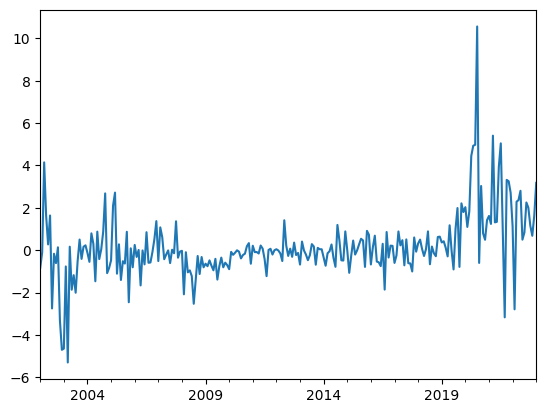

In [48]:
EMP.plot()

In [49]:
EMP

2002-01-31   -0.836962
2002-02-28   -0.094870
2002-03-31    4.146082
2002-04-30    1.634583
2002-05-31    0.275612
                ...   
2022-09-30    2.007250
2022-10-31    1.159976
2022-11-30    0.683116
2022-12-31    1.629182
2023-01-31    3.181355
Freq: M, Length: 253, dtype: float64

In [50]:
#Scaling the EMPI 
EMP_s = scale(EMP) 
EMP_s = pd.DataFrame(EMP_s, columns=['EMPI'])
EMP_s['date'] = pd.date_range(start='2002-01-31', end='2023-01-31', freq='M')
EMP_s.set_index('date', inplace=True)
EMP_s

,EMPI
date,
2002-01-31,-0.642652
2002-02-28,-0.164327
2002-03-31,2.569238
2002-04-30,0.950417
2002-05-31,0.074473
...,...
2022-09-30,1.190624
2022-10-31,0.644502
2022-11-30,0.337135


M2

In [51]:
#Import M2
M2df = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\M2.xlsx")
M2df['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
M2df.set_index('date', inplace=True)
M2df.drop(['Period'], axis=1, inplace=True)
M2df.rename(columns={'in billions of LBP':'M2'})

,M2
date,
1998-01-31,14771.35
1998-02-28,14513.12
1998-03-31,13900.66
1998-04-30,14086.37
1998-05-31,14507.30
...,...
2023-01-31,112763.60
2023-02-28,118911.10
2023-03-31,103837.60


<Axes: xlabel='date'>

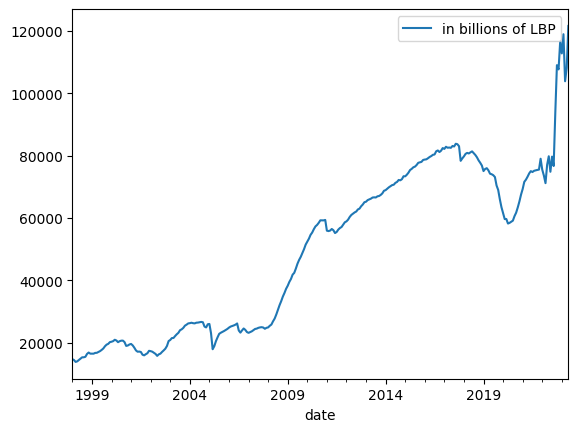

In [52]:
M2df.plot()

In [53]:
M2df.rename(columns={'in billions of LBP':'USD to LBP'}, inplace=True)

In [54]:
M2dfLBP = M2df*1000000000

In [55]:
M2df

,USD to LBP
date,
1998-01-31,14771.35
1998-02-28,14513.12
1998-03-31,13900.66
1998-04-30,14086.37
1998-05-31,14507.30
...,...
2023-01-31,112763.60
2023-02-28,118911.10
2023-03-31,103837.60


<Axes: >

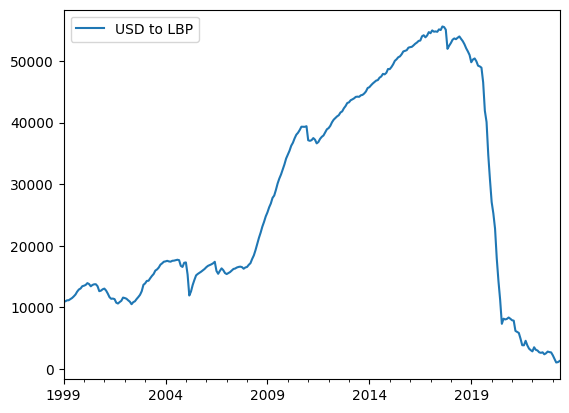

In [56]:
M2USD = M2dfLBP/series
M2USD.dropna(inplace=True)
M2USD = M2USD/1000000
M2USD.plot()

In [57]:
M2USD

,USD to LBP
1999-01-31,10969.721485
1999-02-28,10971.412467
1999-03-31,11134.045093
1999-04-30,11155.125995
1999-05-31,11329.801061
...,...
2023-01-31,2217.715988
2023-02-28,1631.539898
2023-03-31,1048.800590
2023-04-30,1104.462837


<Axes: xlabel='date_column'>

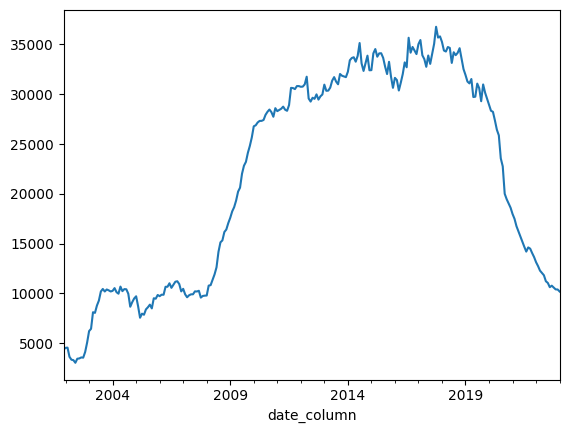

In [58]:
FXres.plot()

In [59]:
M2resratio = M2USD['USD to LBP']/FXres

In [60]:
M2USD

,USD to LBP
1999-01-31,10969.721485
1999-02-28,10971.412467
1999-03-31,11134.045093
1999-04-30,11155.125995
1999-05-31,11329.801061
...,...
2023-01-31,2217.715988
2023-02-28,1631.539898
2023-03-31,1048.800590
2023-04-30,1104.462837


In [61]:
FXres

date_column
2001-12-31     4361
2002-01-31     4539
2002-02-28     4560
2002-03-31     3638
2002-04-30     3348
              ...  
2022-09-30    10779
2022-10-31    10599
2022-11-30    10404
2022-12-31    10398
2023-01-31    10195
Name: FXres, Length: 254, dtype: int64

<Axes: >

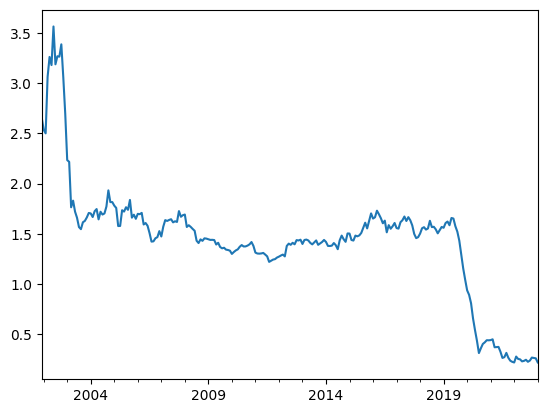

In [62]:
M2resratio.dropna(inplace=True)
M2resratio.plot()

In [63]:
FXresamount = FXres*1000000

In [64]:
FXresamount

date_column
2001-12-31     4361000000
2002-01-31     4539000000
2002-02-28     4560000000
2002-03-31     3638000000
2002-04-30     3348000000
                 ...     
2022-09-30    10779000000
2022-10-31    10599000000
2022-11-30    10404000000
2022-12-31    10398000000
2023-01-31    10195000000
Name: FXres, Length: 254, dtype: int64

<Axes: >

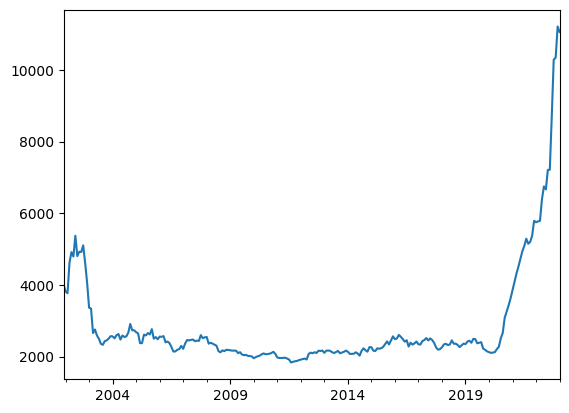

In [65]:
M2resratio = M2dfLBP['USD to LBP']/FXresamount
M2resratio.dropna(inplace=True)
M2resratio.plot()

Financial dollarization

In [66]:
#Import deposits 
depositsdf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Deposits.xlsx")
depositsdf['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
depositsdf.set_index('date', inplace=True)
depositsdf.drop(['Period'], axis=1, inplace=True)
depositsdf.rename(columns={'LBP deposits residents':'LBPdepositsres', 'Total LBP deposits':'TotalLBPdeposits', 'Foreign deposits residents':'FXdepositsres', 'Total foreign deposits':'TotalFXdeposits'}, inplace=True)
depositsdf

,LBPdepositsres,TotalLBPdeposits,FXdepositsres,TotalFXdeposits,Total deposits
date,,,,,
1998-01-31,13483.1,14162.0,19880.0,24669.5,38831.5
1998-02-28,13314.5,13976.0,20615.2,25394.7,39370.7
1998-03-31,12711.5,13355.6,21261.0,26294.8,39650.4
1998-04-30,12863.7,13526.1,21869.4,26903.5,40429.6
1998-05-31,13322.6,13958.3,22040.7,27246.2,41204.5
...,...,...,...,...,...
2023-01-31,40763.0,43814.3,110071.2,142207.8,186022.1
2023-02-28,39819.3,42854.8,1085198.5,1404148.6,1447003.4
2023-03-31,47188.7,50348.1,1077320.0,1396342.7,1446690.8


In [67]:
#Financial dollarization
financial_dollarization = depositsdf['TotalFXdeposits']/depositsdf['Total deposits']

In [68]:
#Deposits in USD
#Import the black market rate 
market = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\usd-to-lbp-market-rate.xls.xlsx")
market['DateTime'] = pd.to_datetime(market['DateTime'], format='%Y-%m-%d %H:%M:%S')
market.set_index('DateTime', inplace=True)
market = market.loc["2019-08-01":"2023-08-28 16:12:55"] #Take sample after the fixed rate is gone
market_monthly = market.resample('M').mean()
print(market_monthly)

              USD to LBP
DateTime                
2019-08-31   1572.258065
2019-09-30   1681.034483
2019-10-31   1721.935484
2019-11-30   1899.666667
2019-12-31   2063.857143
2020-01-31   2271.172840
2020-02-29   2364.347826
2020-03-31   2621.382979
2020-04-30   3243.333333
2020-05-31   4093.500000
2020-06-30   5244.444444
2020-07-31   8081.168831
2020-08-31   7432.520325
2020-09-30   7685.641026
2020-10-31   7803.343373
2020-11-30   7820.217391
2020-12-31   8286.424870
2021-01-31   8762.157895
2021-02-28   9138.005319
2021-03-31  11707.900763
2021-04-30  12201.282723
2021-05-31  12713.386243
2021-06-30  15274.082126
2021-07-31  19407.547170
2021-08-31  19587.014563
2021-09-30  16478.826531
2021-10-31  19690.833333
2021-11-30  22899.881517
2021-12-31  25911.461126
2022-01-31  26492.785714
2022-02-28  20926.096491
2022-03-31  22945.198675
2022-04-30  25760.334646
2022-05-31  29595.125786
2022-06-30  28607.297980
2022-07-31  29546.143617
2022-08-31  32227.693966
2022-09-30  36819.418605


In [69]:
#Import bdl official fixed exchange rate 
bdl_rate = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\BDL_Rate_good.xlsx")
bdl_rate['date_column'] = pd.date_range(start='1999-01-31', end='2023-01-31', freq='M')
bdl_rate = bdl_rate.drop(['Period', 'End of Period'], axis = 1)
bdl_rate.set_index('date_column', inplace=True)
bdl_rate = bdl_rate.loc['1999-01-01':'2019-08-01'] #Take sample until the crash in the 8th month of 2019
bdl_rate.rename(columns={"Period Average": "USD to LBP"}, inplace=True)
print(bdl_rate)

             USD to LBP
date_column            
1999-01-31       1508.0
1999-02-28       1508.0
1999-03-31       1508.0
1999-04-30       1508.0
1999-05-31       1508.0
...                 ...
2019-03-31       1507.5
2019-04-30       1507.5
2019-05-31       1507.5
2019-06-30       1507.5
2019-07-31       1507.5

[247 rows x 1 columns]


In [70]:
#Create the exchange rate series. Official exchange rate from 1999 until 2019-08. 2019-08 until 2023-08, black market rate 
series = pd.concat([bdl_rate, market_monthly])
print(series)

              USD to LBP
1999-01-31   1508.000000
1999-02-28   1508.000000
1999-03-31   1508.000000
1999-04-30   1508.000000
1999-05-31   1508.000000
...                  ...
2023-04-30  97908.771930
2023-05-31  94645.859873
2023-06-30  93329.831933
2023-07-31  91722.368421
2023-08-31  89426.229508

[296 rows x 1 columns]


In [71]:
FXdepositsinUSD = depositsdf['TotalFXdeposits']/series['USD to LBP']

In [72]:
FXdepositsinUSD = depositsdf['TotalFXdeposits']['1999':]/series['USD to LBP'][:'2023-01'] #Real dollars

In [73]:
FXdeppc = FXdepositsinUSD.pct_change(12)

In [74]:
#First step, know how much dollars in old dollars. then calculate back to lira in new rate
FXdepositsinoldUSD =  depositsdf['TotalFXdeposits']['1999':'2023-01-31']/1508

In [75]:
FXdepositsnewUSD =  depositsdf['TotalFXdeposits']['2023-02':]/15000

In [76]:
realFXdeposits = pd.concat([FXdepositsinoldUSD, FXdepositsnewUSD])

<Axes: xlabel='date'>

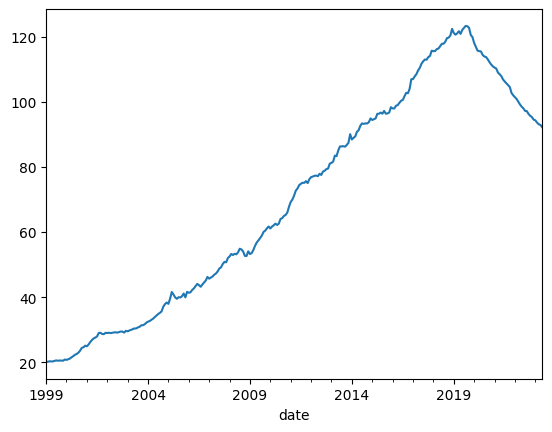

In [77]:
realFXdeposits.plot() #Lollars

In [78]:
LBPdepositsinUSD =  depositsdf['TotalLBPdeposits']/series['USD to LBP']
LBPdepositsinUSD.dropna(inplace=True)

In [79]:
TotaldepositsinUSD = LBPdepositsinUSD + realFXdeposits

In [80]:
Financialdoll = realFXdeposits/TotaldepositsinUSD

<Axes: xlabel='date'>

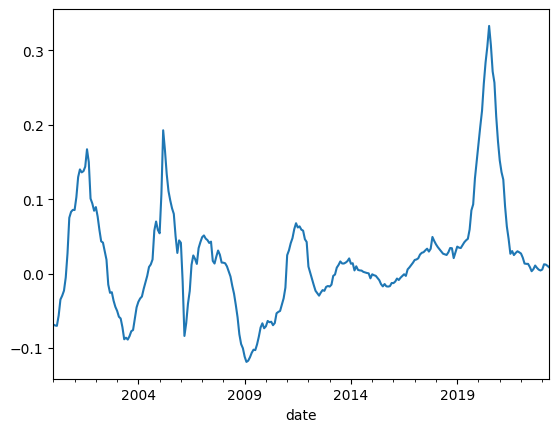

In [81]:
Financialdollpc = Financialdoll.pct_change(12)
Financialdollpc.dropna(inplace=True)
Financialdollpc.plot()

<Axes: xlabel='date'>

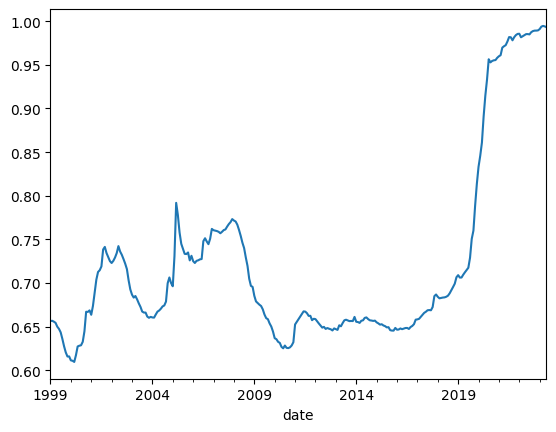

In [82]:
Financialdoll.plot()

In [83]:
Financialdoll_s = scale(Financialdoll)
Financialdoll_s = pd.DataFrame(Financialdoll_s, columns=['FinancialDoll'])
Financialdoll_s['date'] = pd.date_range(start='1999-01-31', end='2023-05-31', freq='M')
Financialdoll_s.set_index('date', inplace=True)
Financialdoll_s

,FinancialDoll
date,
1999-01-31,-0.623237
1999-02-28,-0.619871
1999-03-31,-0.629686
1999-04-30,-0.642367
1999-05-31,-0.683482
...,...
2023-01-31,2.527846
2023-02-28,2.554347
2023-03-31,2.561969


Current account

In [84]:
#Import current account 
CAdf2 = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Current_Account.xlsx") 
CAdf2['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
CAdf2.set_index('date', inplace=True)
CAdf2.drop(['Period'], axis=1, inplace=True)
CAdf2

,Net,Debit,Credit
date,,,
2002-01-31,-517.04,-1110.27,593.23
2002-02-28,-239.34,-847.83,608.49
2002-03-31,-319.25,-939.75,620.50
2002-04-30,-440.67,-1111.04,670.37
2002-05-31,-282.71,-1024.13,741.42
...,...,...,...
2022-08-31,-788.71,-2722.28,1933.58
2022-09-30,-706.12,-2550.66,1844.54
2022-10-31,-740.92,-2342.95,1602.03


In [85]:
CAdf =  pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Current_Account.xlsx") 
CAdf['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
CAdf.set_index('date', inplace=True)
CAdf.drop(['Period', 'Debit', 'Credit'], axis=1, inplace=True)
CAdf

,Net
date,
2002-01-31,-517.04
2002-02-28,-239.34
2002-03-31,-319.25
2002-04-30,-440.67
2002-05-31,-282.71
...,...
2022-08-31,-788.71
2022-09-30,-706.12
2022-10-31,-740.92


In [86]:
CAdf2['Debit'] = CAdf2['Debit']*(-1)

In [87]:
CAratio = CAdf2['Debit']/CAdf2['Credit']

In [88]:
CAratio

date
2002-01-31    1.871568
2002-02-28    1.393334
2002-03-31    1.514504
2002-04-30    1.657353
2002-05-31    1.381309
                ...   
2022-08-31    1.407896
2022-09-30    1.382816
2022-10-31    1.462488
2022-11-30    1.529916
2022-12-31    1.024125
Length: 252, dtype: float64

In [89]:
CApc = CAdf.pct_change(12)
CApc.dropna(inplace=True)

<Axes: xlabel='date'>

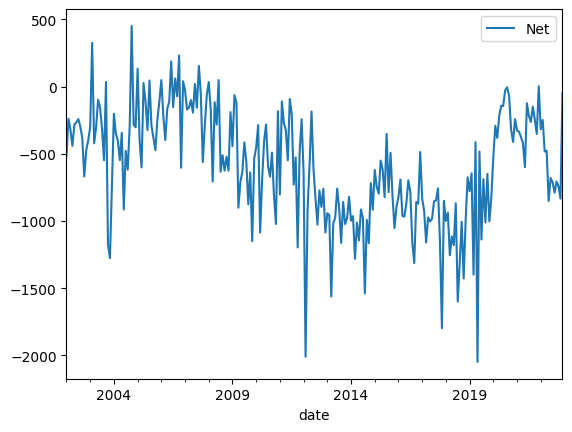

In [90]:
CAdf.plot()

In [91]:
#Scale data 
CAdf_scaled = scale(CAdf)
CAdf_scaled = pd.DataFrame(CAdf_scaled, columns=['CA'])
CAdf_scaled['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
CAdf_scaled.set_index('date', inplace=True)
CAdf_scaled

,CA
date,
2002-01-31,0.155669
2002-02-28,0.822956
2002-03-31,0.630940
2002-04-30,0.339179
2002-05-31,0.718742
...,...
2022-08-31,-0.497129
2022-09-30,-0.298673
2022-10-31,-0.382294


Financial account

In [92]:
#Import financial account 
FAdf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Financial_account.xlsx") 
FAdf['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
FAdf.set_index('date', inplace=True)
FAdf.drop(['Period', 'Assets', 'Net'], axis=1, inplace=True)
FAdf

,Liabilities
date,
2002-01-31,-35.68
2002-02-28,61.09
2002-03-31,213.22
2002-04-30,93.23
2002-05-31,254.69
...,...
2022-08-31,28.29
2022-09-30,10.43
2022-10-31,-238.26


In [93]:
FApc = FAdf.pct_change(12)
FApc.dropna(inplace=True)

<Axes: xlabel='date'>

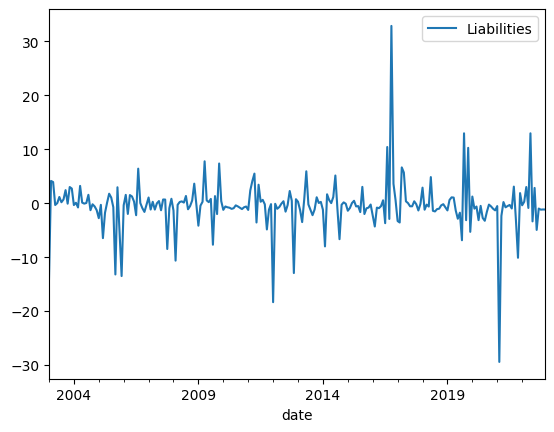

In [94]:
FApc.plot()

<Axes: xlabel='date'>

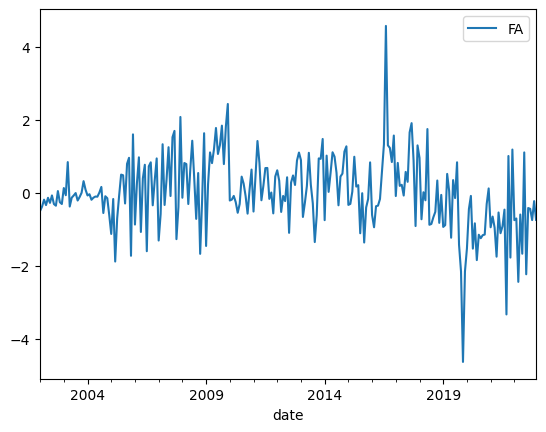

In [95]:
#Scale data 
FAdf_scaled = scale(FAdf)
FAdf_scaled = pd.DataFrame(FAdf_scaled, columns=['FA'])
FAdf_scaled['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
FAdf_scaled.set_index('date', inplace=True)
FAdf_scaled.plot()

Remittances

In [96]:
#Import financial account 
remittances = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\Remittances.xlsx") 
remittances['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
remittances.set_index('date', inplace=True)
remittances.drop(['Period'], axis=1, inplace=True)

In [97]:
#Scale remittances
remittances_scaled = scale(remittances)
remittances_scaled = pd.DataFrame(remittances_scaled, columns=['Rem'])
remittances_scaled['date'] = pd.date_range(start='2002-01-31', end='2022-12-31', freq='M')
remittances_scaled.set_index('date', inplace=True)

<Axes: xlabel='date'>

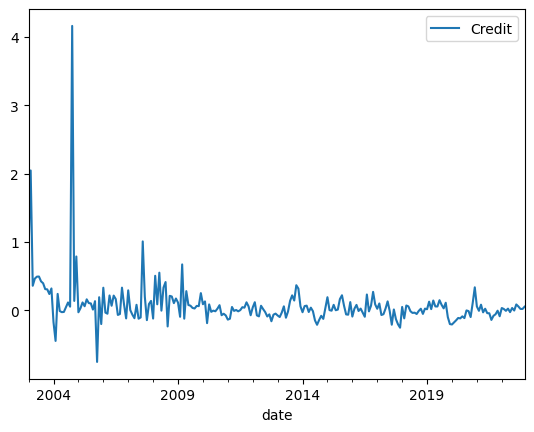

In [98]:
rempc = remittances.pct_change(12)
rempc.dropna(inplace=True)
rempc.plot()

Partition 4 : External shock

Oil

In [99]:
Oildf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\OIL.xlsx")
Oildf['date'] = pd.date_range(start='1998-01-01', end='2023-05-31', freq='M')
Oildf.set_index('date', inplace=True)
Oildf.drop({'observation_date'}, axis=1, inplace=True)
Oildf.dropna(inplace=True)
Oildf

,POILBREUSDM
date,
1998-01-31,15.510455
1998-02-28,14.366000
1998-03-31,13.460000
1998-04-30,13.809091
1998-05-31,14.508571
...,...
2023-01-31,84.081818
2023-02-28,83.632500
2023-03-31,79.256522


In [100]:
Oilpc = Oildf.pct_change(12)
Oilpc.dropna(inplace=True)

In [101]:
#Scale data 
Oil_s = scale(Oildf)
Oil_s = pd.DataFrame(Oil_s, columns=['Oil'])
Oil_s['date'] = pd.date_range(start='1998-01-31', end='2023-05-31', freq='M')
Oil_s.set_index('date', inplace=True)
Oil_s

,Oil
date,
1998-01-31,-1.493594
1998-02-28,-1.530349
1998-03-31,-1.559446
1998-04-30,-1.548235
1998-05-31,-1.525770
...,...
2023-01-31,0.708648
2023-02-28,0.694218
2023-03-31,0.553679


Tadawol

In [102]:
#Import tadawol
tadawoldf = pd.read_csv(r"G:\Mon Drive\S2 M2\Dissertation\Data\Tadawol_CSV.csv")
tadawoldf.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
tadawoldf['Date'] = pd.to_datetime(tadawoldf['Date'], format='%Y-%m-%d')
tadawoldf.set_index('Date', inplace=True)
tadawoldf.dropna(inplace=True)
tadawoldf

,Close
Date,
2000-01-03,2028.630005
2000-01-04,2028.630005
2000-01-05,2028.630005
2000-01-06,2028.630005
2000-01-10,2028.630005
...,...
2023-09-03,11455.780273
2023-09-04,11430.870117
2023-09-05,11410.980469


In [103]:
tadawoldf = tadawoldf.resample('M').mean()

In [104]:
tadawolpc = tadawoldf.pct_change(12)

In [105]:
tadawolpc.dropna(inplace=True)

In [106]:
#Scale data 
tadawol_scaled = scale(tadawoldf)
tadawol_scaled = pd.DataFrame(tadawol_scaled, columns=['Tadawol'])
tadawol_scaled['date'] = pd.date_range(start='2000-01-31', end='2023-09-30', freq='M')
tadawol_scaled.set_index('date', inplace=True)
tadawol_scaled

,Tadawol
date,
2000-01-31,-1.719565
2000-02-29,-1.731326
2000-03-31,-1.731152
2000-04-30,-1.732493
2000-05-31,-1.722843
...,...
2023-05-31,1.181505
2023-06-30,1.229402
2023-07-31,1.329985


# GDP

In [107]:
gdp = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\BDL_Coin.xlsx") #Monthly BDL series
gdp.set_index('Date', inplace=True)
gdp['Date'] = pd.date_range(start='1998-01-31', end='2022-08-31', freq='M')
gdp.set_index('Date', inplace=True)
gdp

,Index
Date,
1998-01-31,129
1998-02-28,136
1998-03-31,131
1998-04-30,134
1998-05-31,136
...,...
2022-04-30,113
2022-05-31,138
2022-06-30,130


<Axes: xlabel='Date'>

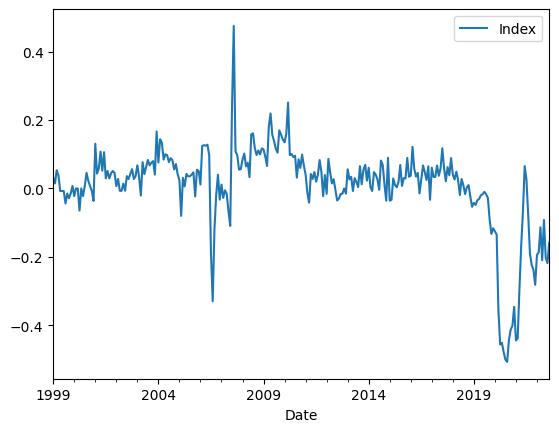

In [108]:
gdppct = gdp.pct_change(12)
gdppct.dropna(inplace=True)
gdppct.plot()

<Axes: xlabel='date'>

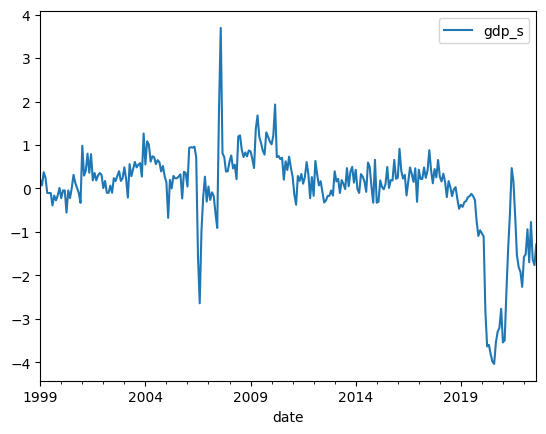

In [109]:
#Scale data 
gdppct_s = scale(gdppct)
gdppct_s = pd.DataFrame(gdppct_s, columns=['gdp_s'])
gdppct_s['date'] = pd.date_range(start='1999-01-31', end='2022-08-31', freq='M')
gdppct_s.set_index('date', inplace=True)
gdppct_s.plot()

In [110]:
gdppct_s

,gdp_s
date,
1999-01-31,0.197256
1999-02-28,0.068889
1999-03-31,0.373857
1999-04-30,0.246909
1999-05-31,-0.104810
...,...
2022-04-30,-1.698874
2022-05-31,-0.772180
2022-06-30,-1.641106


In [111]:
gdppct3 = gdppct.shift(-3)

In [112]:
gdppct3 

,Index
Date,
1999-01-31,0.037313
1999-02-28,-0.007353
1999-03-31,-0.007353
1999-04-30,-0.007407
1999-05-31,-0.043796
...,...
2022-04-30,-0.217949
2022-05-31,-0.157895
2022-06-30,NaN


<Axes: xlabel='date'>

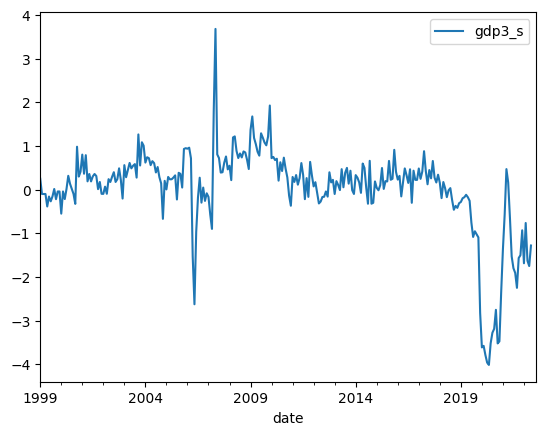

In [113]:
#Scale data 
gdppct3_s = scale(gdppct3)
gdppct3_s = pd.DataFrame(gdppct3_s, columns=['gdp3_s'])
gdppct3_s['date'] = pd.date_range(start='1999-01-31', end='2022-08-31', freq='M')
gdppct3_s.set_index('date', inplace=True)
gdppct3_s.plot()

In [114]:
gdppct6 = gdppct.shift(-6)
gdppct6

,Index
Date,
1999-01-31,-0.007407
1999-02-28,-0.043796
1999-03-31,-0.014815
1999-04-30,-0.028777
1999-05-31,-0.014286
...,...
2022-04-30,NaN
2022-05-31,NaN
2022-06-30,NaN


<Axes: xlabel='date'>

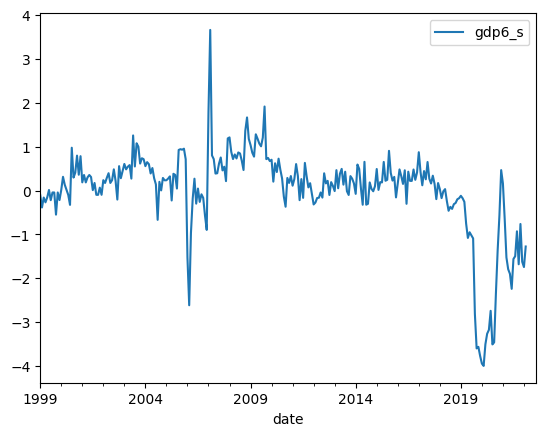

In [115]:
gdppct6_s = scale(gdppct6)
gdppct6_s = pd.DataFrame(gdppct6_s, columns=['gdp6_s'])
gdppct6_s['date'] = pd.date_range(start='1999-01-31', end='2022-08-31', freq='M')
gdppct6_s.set_index('date', inplace=True)
gdppct6_s.plot()

In [116]:
gdppct12 = gdppct.shift(-12)
gdppct12

,Index
Date,
1999-01-31,-0.022556
1999-02-28,0.000000
1999-03-31,0.000000
1999-04-30,-0.064748
1999-05-31,0.000000
...,...
2022-04-30,NaN
2022-05-31,NaN
2022-06-30,NaN


<Axes: xlabel='date'>

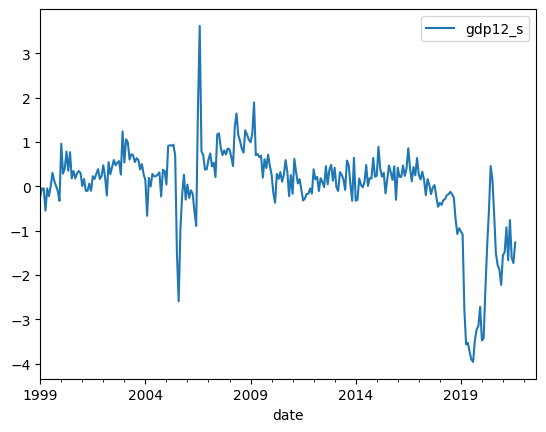

In [117]:
gdppct12_s = scale(gdppct12)
gdppct12_s = pd.DataFrame(gdppct12_s, columns=['gdp12_s'])
gdppct12_s['date'] = pd.date_range(start='1999-01-31', end='2022-08-31', freq='M')
gdppct12_s.set_index('date', inplace=True)
gdppct12_s.plot()

# Domestic Macro partition

In [118]:
domdf = pd.read_excel(r"G:\Mon Drive\S2 M2\Dissertation\Data\domesticmacropartition.xlsx") 
domdf['Date'] = pd.date_range(start='1998-02-28', end='2022-12-31', freq='M')
domdf.set_index('Date', inplace=True)
domdf.drop('Period', axis=1, inplace=True)

In [119]:
domdf.columns

Index(['Construction permits ', 'Cement deliveries',
       'Incoming freight at the port', 'outgoing freight', 'passenger inflow',
       'passenger outflow'],
      dtype='object')

In [120]:
# Assuming 'df' is your DataFrame with a DateTime index
# You can adjust each column individually

adjusted_domdfs = {}

for column in domdf.columns[[2, 3, 4, 5]]:
    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(domdf[column], model='multiplicative', period=12)
    
    # Extract the seasonal component
    seasonal_component = decomposition.seasonal
    
    # Create a new DataFrame with only the seasonal component
    adjusted_domdfs[column] = domdf[column]/seasonal_component

for column in domdf.columns[[0, 1]]:
    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(domdf[column], model='additive', period=12)
    
    # Extract the seasonal component
    seasonal_component = decomposition.seasonal
    
    # Create a new DataFrame with only the seasonal component
    adjusted_domdfs[column] = domdf[column] - seasonal_component


# Now, 'adjusted_dfs' is a dictionary where each key represents the column name, 
# and the corresponding value is the seasonally adjusted series for that column.


In [121]:
seasonally_adjusted_domdf = pd.DataFrame(adjusted_domdfs)

<Axes: xlabel='Date'>

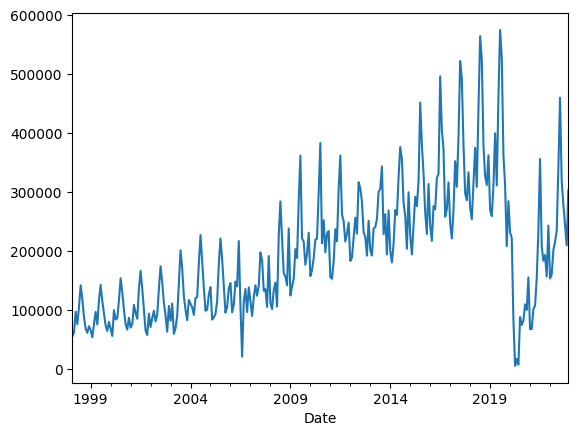

In [122]:
domdf['passenger inflow'].plot()

<Axes: xlabel='Date'>

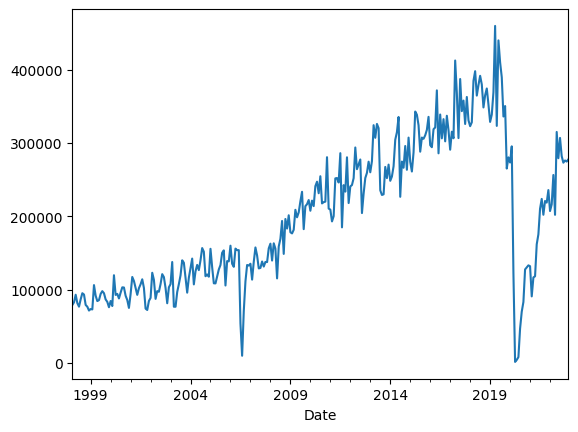

In [123]:
seasonally_adjusted_domdf['passenger outflow'].plot()

# All dataframe

In [124]:
df = pd.concat([Term_s, Interbank_s, sovereign_s, LBPratespread_s, USDratespread_s, CDratespread_s,LBPdeprate_s, USDdeprate_s, EMP_s, Financialdoll_s, CAdf_scaled, FAdf_scaled, remittances_scaled, Oilpc, tadawolpc, gdppct_s], axis=1)
df.dropna(inplace=True)
df

,Term,Interbank,Sov,LBPratespread,USDratespread,CDratespread,LBPdeprate,USDdeprate,EMPI,FinancialDoll,CA,FA,Rem,POILBREUSDM,Close,gdp_s
2002-01-31,1.091501,-0.563338,2.124566,1.482655,1.503821,0.814751,1.137847,0.455391,-0.642652,0.003260,0.155669,-0.491608,-2.254509,-0.223224,0.073362,0.006657
2002-02-28,1.091501,-0.563338,2.128400,1.428267,1.572000,0.856102,1.117010,0.390529,-0.164327,0.026639,0.822956,-0.372134,-2.235535,-0.263528,0.083613,0.171822
2002-03-31,1.091501,-0.375929,1.921367,1.423322,1.685632,0.842318,1.123955,0.390529,2.569238,0.062414,0.630940,-0.184311,-2.220160,-0.041287,0.120171,-0.100844
2002-04-30,1.091501,-0.563338,1.975042,1.482655,1.696995,1.007722,1.040608,0.384043,0.950417,0.110293,0.339179,-0.332453,-2.196688,-0.002792,0.182237,-0.101593
2002-05-31,1.091501,-0.469633,2.036385,1.339269,1.833354,0.752724,1.169102,0.390529,0.074473,0.185584,0.718742,-0.133112,-2.217052,-0.101578,0.245890,0.063996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.837399,0.032621,-1.360481,0.691560,1.549273,2.689330,-2.098830,-2.210412,1.422100,2.461784,0.252146,-0.591056,0.511980,0.619911,0.338390,-1.698874
2022-05-31,-0.837399,0.032621,-1.391153,0.305901,0.378861,2.758249,-2.133558,-2.223385,1.704562,2.473419,-0.646229,-1.663433,0.217641,0.639682,0.240982,-0.772180
2022-06-30,-0.837399,0.032621,-1.536842,0.439398,0.674305,2.785816,-2.147449,-2.249329,0.219367,2.473905,-0.235068,1.109210,0.378918,0.600984,0.106733,-1.641106
2022-07-31,-0.837399,0.032621,-1.552178,0.404788,0.026601,2.923653,-2.216906,-2.229871,0.438282,2.470450,-0.310807,-2.226085,0.238333,0.414628,0.074266,-1.763117


In [125]:
mydfcsv = df.to_csv()

In [126]:
mydfcsv

',Term,Interbank,Sov,LBPratespread,USDratespread,CDratespread,LBPdeprate,USDdeprate,EMPI,FinancialDoll,CA,FA,Rem,POILBREUSDM,Close,gdp_s\r\n2002-01-31,1.091501178295565,-0.5633375691927249,2.124565714799304,1.4826545030914486,1.5038205245156981,0.814750679243421,1.137846769931603,0.4553907340791746,-0.64265206005862,0.003259787128085523,0.1556690688779066,-0.49160760908431705,-2.2545086840828477,-0.22322437075374557,0.07336168155742007,0.006656615890041536\r\n2002-02-28,1.091501178295565,-0.5633375691927249,2.1283996499116538,1.4282667285684683,1.5719998813649636,0.8561016996559742,1.1170097965302082,0.3905293471854846,-0.16432671496434664,0.026638869164401294,0.8229562609055483,-0.37213364516485525,-2.2355349245603513,-0.2635276826842077,0.08361336237292294,0.17182173613409785\r\n2002-03-31,1.091501178295565,-0.3759291000401403,1.9213671538447685,1.4233223854300145,1.6856321427804046,0.8423180261851231,1.1239554543306731,0.3905293471854846,2.5692377633369143,0.062414197836348724,0.630

In [127]:
os.makedirs('data/clean', exist_ok=True)  
df.to_csv('data/clean/alldata.csv')

In [128]:
data_path = os.path.join('data', 'clean', 'alldata.csv')
df = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

ValueError: Missing column provided to 'parse_dates': 'date'

In [151]:
Interbank.rename(columns={'In percent':'Interbank'}, inplace=True)
LBPratespread.rename(columns={'In percent':'LBPratespread'}, inplace=True)
USDratespread.rename(columns={'In percent':'USDratespread'}, inplace=True)
CDratespread.rename(columns={'In percent':'CDratespread'}, inplace=True)
LBPdeprate.rename(columns={'In percent':'LBPdeprate'}, inplace=True)
USDdeprate.rename(columns={'In percent':'USDdeprate'}, inplace=True)
gdppct3.rename(columns={'Index':'gdp3'}, inplace=True)
gdppct6.rename(columns={'Index':'gdp6'}, inplace=True)
gdppct12.rename(columns={'Index':'gdp12'}, inplace=True)
FApc.rename(columns={'Liabilities':'FApc'}, inplace=True)
CApc.rename(columns={'Net':'CApc'}, inplace=True)
rempc.rename(columns={'Credit':'rempc'}, inplace=True)


In [152]:
dfnonscaled = pd.concat([Term, Interbank, Sovereign_spread, LBPratespread, USDratespread, CDratespread,LBPdeprate, USDdeprate, EMP, Financialdoll, CAdf, FAdf, remittances, FApc, CApc, CAratio, rempc, Oilpc, tadawolpc, gdppct, gdppct3, gdppct6, gdppct12, dep_sovspread, M2resratio, seasonally_adjusted_domdf], axis=1)
dfnonscaled.dropna(inplace=True)
#dfnonscaled.set_index('date', inplace=True)a

In [153]:
dfnonscaled.rename(columns={0:'Term', 1:'Sov', 2:'EMP', 3:'Financialdoll', 4:'CAratio', 5:'dep_sov_spread',6:'M2resratio', 'Net':'CA', 'Liabilities':'FA', 'Credit':'Rem', 'POILBREUSDM':'Oil', 'Close':'Tadawol', 'Index':'gdp', 'Incoming freight at the port':'portinflow', 'outgoing freight':'portoutflow'}, inplace=True)

In [154]:
dfnonscaled

,Term,Interbank,Sov,LBPratespread,USDratespread,CDratespread,LBPdeprate,USDdeprate,EMP,Financialdoll,...,gdp6,gdp12,dep_sov_spread,M2resratio,portinflow,portoutflow,passenger inflow,passenger outflow,Construction permits,Cement deliveries
2003-01-31,2.45,4.0,7.67,6.12,5.64,-3.87,9.27,3.80,-4.643075,0.686739,...,0.083333,0.075949,-2.31,3366.772274,450795.430025,47198.959073,102655.671256,107561.864230,7.261989e+05,253019.293006
2003-02-28,2.45,4.0,7.78,6.72,5.71,-3.68,8.68,3.77,-0.765084,0.683388,...,0.067568,0.143791,-1.72,3340.934884,338120.328951,35059.358972,149157.907486,137684.866072,6.156858e+05,164152.845090
2003-03-31,2.45,4.0,7.84,6.28,5.60,-3.73,8.73,3.74,-5.296477,0.685227,...,0.075342,0.133803,-1.77,2658.443815,316770.016967,34440.591424,70541.465206,76687.117905,4.438330e+05,188737.803423
2003-04-30,2.45,4.0,7.79,6.02,5.58,-3.76,8.51,3.64,0.166753,0.681371,...,0.080000,0.084416,-1.55,2757.878261,543982.422846,43446.469312,75172.180004,76661.354544,6.915806e+05,312282.194048
2003-05-31,2.45,5.0,7.99,6.51,5.64,-3.73,8.23,3.47,-1.862058,0.676781,...,0.040541,0.100000,-1.27,2592.383555,433598.333979,37926.435608,101353.150849,96779.461751,8.865709e+05,152566.369395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,1.56,3.0,4.90,5.99,6.39,0.89,2.01,0.49,1.315150,0.971283,...,-0.224242,-0.209790,1.49,4512.302101,313479.524674,62285.972486,117124.962340,118202.453613,1.324697e+06,149813.194048
2021-05-31,1.56,3.0,4.90,6.01,6.19,1.05,1.85,0.42,1.340303,0.972534,...,-0.237805,-0.092105,1.65,4730.856888,342295.219910,62753.063430,172382.073820,161860.812828,4.582099e+05,100341.369395
2021-06-30,1.56,3.0,4.86,5.48,6.07,1.06,1.84,0.39,3.932196,0.976695,...,-0.281609,-0.202454,1.66,4941.198551,288568.514776,65471.395534,188329.623328,175439.282692,7.323275e+05,261910.082937
2021-07-31,1.56,3.0,4.84,5.52,5.66,1.16,1.74,0.33,5.043791,0.981780,...,-0.194444,-0.217949,1.76,5091.071307,283576.439392,74379.142358,230577.824386,210413.302019,9.350560e+05,243669.698804


In [155]:
pcdf = {}

for column in dfnonscaled.columns[[25, 26, 27, 28, 29, 30]]:
    # Perform pc change
    pcdf[column] = dfnonscaled[column].pct_change(12) 

In [156]:
pcdf = pd.DataFrame(pcdf)

In [157]:
pcdf.rename(columns={'portinflow':'portinflowpc', 'portoutflow':'portoutflowpc', 'passenger inflow':'passengerinflowpc', 'passenger outflow':'passengeroutflowpc', 'Construction permits ':'Constructionpermitspc', 'Cement deliveries':'Cementdeliveriespc'}, inplace=True)

In [158]:
dfnonscaled = pd.concat([dfnonscaled, pcdf], axis=1)

In [159]:
dfnonscaled.dropna(inplace=True)

In [160]:
dfnonscaled['Dummy_variable2006'] = 0

In [161]:
dfnonscaled['Dummy_variable2006']['2006-08-31'] = 1

C:\Users\jadfa\AppData\Local\Temp\ipykernel_21288\2640400347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnonscaled['Dummy_variable2006']['2006-08-31'] = 1


In [164]:
dfnonscaled

,Term,Interbank,Sov,LBPratespread,USDratespread,CDratespread,LBPdeprate,USDdeprate,EMP,Financialdoll,...,passenger outflow,Construction permits,Cement deliveries,portinflowpc,portoutflowpc,passengerinflowpc,passengeroutflowpc,Constructionpermitspc,Cementdeliveriespc,Dummy_variable2006
2004-01-31,2.52,4.00,6.23,3.60,5.21,-3.15,7.55,3.41,-0.124678,0.660648,...,129296.533653,8.494009e+05,267932.293006,-0.192316,0.184994,0.352923,0.202067,0.169653,0.058940,0
2004-02-29,2.60,3.50,6.23,3.69,5.23,-3.03,7.43,3.37,-0.547668,0.660485,...,142375.338880,7.269578e+05,288217.845090,0.217461,0.699338,-0.058631,0.034067,0.180729,0.755790,0
2004-03-31,2.66,6.00,6.37,3.84,5.23,-2.86,7.26,3.32,0.796238,0.664061,...,107144.439167,7.127910e+05,182508.803423,0.189919,0.518380,0.546469,0.397163,0.605989,-0.033003,0
2004-04-30,2.71,3.75,5.86,3.99,4.97,-2.73,7.13,3.30,0.301791,0.667326,...,125017.667638,7.760996e+05,207343.194048,-0.290181,0.405922,0.742473,0.630778,0.122211,-0.336039,0
2004-05-31,2.69,4.00,5.38,4.00,5.01,-2.66,7.06,3.23,-1.463656,0.668629,...,133736.186995,6.139679e+05,196035.369395,-0.315968,0.264171,0.348978,0.381865,-0.307480,0.284919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,1.56,3.00,4.90,5.99,6.39,0.89,2.01,0.49,1.315150,0.971283,...,118202.453613,1.324697e+06,149813.194048,0.105977,0.360102,21.485014,86.554357,-253.448435,0.480409,0
2021-05-31,1.56,3.00,4.90,6.01,6.19,1.05,1.85,0.42,1.340303,0.972534,...,161860.812828,4.582099e+05,100341.369395,-0.022272,0.201174,8.246352,38.262094,4.436957,0.080306,0
2021-06-30,1.56,3.00,4.86,5.48,6.07,1.06,1.84,0.39,3.932196,0.976695,...,175439.282692,7.323275e+05,261910.082937,-0.021829,0.195838,32.675905,21.090218,0.417812,0.747604,0
2021-07-31,1.56,3.00,4.84,5.52,5.66,1.16,1.74,0.33,5.043791,0.981780,...,210413.302019,9.350560e+05,243669.698804,-0.125619,0.810485,3.053923,3.489639,0.361121,1.213455,0


In [167]:
os.makedirs('Data', exist_ok=True)  
dfnonscaled.to_csv('Data/alldatanonscaled.csv')